In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
train = pd.read_csv('titanic_train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
sum(pd.isnull(train['Age']))

177

In [7]:
Pclass_1 = train[train['Pclass']==1]['Age'].mean()
Pclass_2 = train[train['Pclass']==2]['Age'].mean()
Pclass_3 = train[train['Pclass']==3]['Age'].mean()

print(f"Pclass_1: {Pclass_1}")
print(f"Pclass_2: {Pclass_2}")
print(f"Pclass_3: {Pclass_3}")

Pclass_1: 38.233440860215055
Pclass_2: 29.87763005780347
Pclass_3: 25.14061971830986


In [8]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return Pclass_1
        elif Pclass ==2:
            return Pclass_2
        else:
            return Pclass_3
    else:
        return Age

In [9]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

<AxesSubplot:>

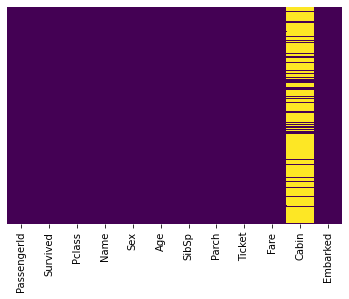

In [10]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
Pclasses = pd.get_dummies(train['Pclass'], prefix='Pclass_')

In [12]:
Pclasses.head()

,Pclass__1,Pclass__2,Pclass__3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [13]:
sex = pd.get_dummies(train['Sex'],drop_first=True )

In [14]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [15]:
embarked = pd.get_dummies(train['Embarked'], drop_first=True)

In [16]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [17]:
train = pd.concat([train, Pclasses, sex, embarked], axis = 1)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass__1,Pclass__2,Pclass__3,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,1,0,1


In [19]:
train.drop(['PassengerId', 'Pclass', 'Sex', 'Embarked','Name', 'Ticket', 'Cabin'], axis =1, inplace=True)

In [20]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass__1,Pclass__2,Pclass__3,male,Q,S
0,0,22.0,1,0,7.2500,0,0,1,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,1,0,1


<AxesSubplot:>

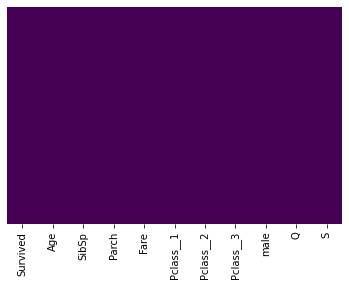

In [21]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Age        891 non-null    float64
 2   SibSp      891 non-null    int64  
 3   Parch      891 non-null    int64  
 4   Fare       891 non-null    float64
 5   Pclass__1  891 non-null    uint8  
 6   Pclass__2  891 non-null    uint8  
 7   Pclass__3  891 non-null    uint8  
 8   male       891 non-null    uint8  
 9   Q          891 non-null    uint8  
 10  S          891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(6)
memory usage: 40.2 KB


In [23]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [24]:
X.head()


,Age,SibSp,Parch,Fare,Pclass__1,Pclass__2,Pclass__3,male,Q,S
0,22.0,1,0,7.2500,0,0,1,1,0,1
1,38.0,1,0,71.2833,1,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,0,1
3,35.0,1,0,53.1000,1,0,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,1,0,1


In [25]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logmodel = LogisticRegression()

In [30]:
logmodel

LogisticRegression()

In [31]:
logmodel.fit(X_train , y_train)

C:\Users\Predator\Anaconda3\envs\dsmc_bootcamp\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
logmodel

LogisticRegression()

In [34]:
prediction  = logmodel.predict(X_test)

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.81      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_test, prediction)

array([[136,  18],
       [ 38,  76]], dtype=int64)